# Passo 1 - Analise do panorama geral

1. Abordar o problema:
    O problema proposto envolve a análise de falhas em motores elétricos industriais. O objetivo do projeto é propor um classificador de falhas dos equipamentos com o intuito de melhorar o planejameneto e otimizar os processos de manutenção.
     
2. Medida de desempenho:
    Para a análise inicial do problema, irá ser utilizado o recall (sensibilidade), que irá analisar a proporção de verdadeiros positivos em relação ao total de instâncias positivas reais. Isso é feito com o foco em que devemos ter o mínimo de casos de falso negativo, ou seja, evitar a indicação de situação normal, quando há falha.
    Os demais - acurácia, pois quanto mais acertar, melhor!
     
3. Verificação de hipótese:
    Vibração pode acabar indicando mais o desbalanceamneto e o desalinhamento;
    Pico de corrente podem indicar a sobrecarga e desacoplado (girando livre);

# Passo 2 - Carregando os Dados para análise**

1. Carrega-se os dados a partir de um arquivo csv;
2. Verifica-se os valores, tipos e estruturas dos dados;
3. Verificar os dados faltantes e balanceamento.

In [1]:
# Importando as bibliotecas necessárias para atuar

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Adotando a função read_csv da biblioteca pandas para ler arquivo .csv de dados 
motores = pd.read_csv('Dataset APS1_Sinais Eletricos e Vibracao_csv.xls')

In [3]:
# Exibindo os dados carregado
motores

,tempo_s,tipo_setup,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
0,0.00,0.0,0.44905,63.67320,1.43660,0.042740,21.869566,0.113479,0.175,91.738,0.406,12.474475,15.435837,4.223108,-50.647991,-63.189443,-47.864704,-59.629807,-73.010381,-49.583755
1,0.08,0.0,0.44610,69.40320,1.67860,0.048945,1.600020,0.854342,0.227,7.359,3.843,20.070610,13.335535,16.966677,-50.696943,-63.340003,-48.313132,-59.591150,-72.360239,-49.473893
2,0.16,0.0,0.45175,69.11385,1.39950,0.042337,5.220348,0.284000,0.207,24.185,1.395,19.087723,7.345771,11.032327,-47.724322,-62.837371,-48.384219,-55.194912,-63.127903,-48.083630
3,0.24,0.0,0.43510,68.85665,1.39705,0.063224,3.437546,0.219507,0.228,16.040,0.973,6.869051,19.849528,9.136137,-47.652608,-62.613368,-48.768793,-55.275822,-63.310116,-47.937933
4,0.32,0.0,0.45055,70.52860,1.43375,0.048497,1.240032,0.111967,0.222,4.394,0.425,20.205840,2.325535,2.818658,-47.019446,-61.314274,-49.016646,-54.665312,-60.825200,-47.886619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,39.68,4.0,0.46575,68.42795,1.59235,0.042147,8.058820,0.900427,0.199,37.403,4.276,5.486469,22.266532,21.582764,-33.195195,-52.502279,-41.610532,-37.874381,-49.147213,-42.417970
2501,39.76,4.0,0.44705,62.32815,1.57365,0.068987,15.876663,0.904702,0.231,62.159,4.218,5.237910,11.518238,21.593782,-33.360763,-52.868492,-42.054637,-37.995903,-49.251871,-42.703237
2502,39.84,4.0,0.47110,76.04075,1.77275,0.045194,34.799709,1.657858,0.191,184.906,7.810,9.874863,20.660427,6.075266,-33.497896,-53.300911,-42.289221,-38.129107,-48.947030,-42.896321
2503,39.92,4.0,0.47745,72.86850,1.39700,0.043033,0.826486,0.131019,0.194,2.893,0.383,21.320253,2.327027,1.904577,-33.581380,-53.601503,-42.527074,-38.258422,-48.618126,-42.420583


In [4]:
# Verificar dimensões do dataframe (nro de linhas e colunas)
motores.shape

(2505, 20)

In [5]:
# Verificar informações gerais do dataset (nro de colunas, nomes, quantidade e tipo de dados)
motores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_s               2505 non-null   float64
 1   tipo_setup            2505 non-null   float64
 2   I_entrada_A           2505 non-null   float64
 3   P_entrada_W           2505 non-null   float64
 4   I_saida_A             2505 non-null   float64
 5   DesvPad_I_entrada_A   2505 non-null   float64
 6   DesvPad _P_entrada_W  2505 non-null   float64
 7   DesvPad _I_saida_A    2505 non-null   float64
 8   Amp_I_entrada_A       2505 non-null   float64
 9   Amp_P_entrada_W       2505 non-null   float64
 10  Amp_I_saida_A         2505 non-null   float64
 11  Kurtosis_I_entrada_A  2505 non-null   float64
 12  Kurtosis_P_entrada_W  2505 non-null   float64
 13  Kurtosis_I_saida_A    2505 non-null   float64
 14  Mag_S1_f1_dBrms       2505 non-null   float64
 15  Mag_S1_f2_dBrms      

In [6]:
# Verificar valores faltantes (não nulos)
motores.isnull().sum()

tempo_s                 0
tipo_setup              0
I_entrada_A             0
P_entrada_W             0
I_saida_A               0
DesvPad_I_entrada_A     0
DesvPad _P_entrada_W    0
DesvPad _I_saida_A      0
Amp_I_entrada_A         0
Amp_P_entrada_W         0
Amp_I_saida_A           0
Kurtosis_I_entrada_A    0
Kurtosis_P_entrada_W    0
Kurtosis_I_saida_A      0
Mag_S1_f1_dBrms         0
Mag_S1_f2_dBrms         0
Mag_S1_f3_dBrms         0
Mag_S2_f1_dBrms         0
Mag_S2_f2_dBrms         0
Mag_S2_f3_dBrms         0
dtype: int64

In [7]:
# Verificar balanceamento do dataset (qtde de cada classe)
motores['tipo_setup'].value_counts()

#Exibi-se o histograma das classes
# motores.tipo_setup.hist()

tipo_setup
0.0    501
1.0    501
2.0    501
3.0    501
4.0    501
Name: count, dtype: int64

In [8]:
# Modificando os valores do tipo_setup, de número para texto descritivo
motores['tipo_setup'] = motores['tipo_setup'].map({0.0: 'Normal', 1.0: 'Desacoplado', 2.0: 'Sobrecarga', 3.0: 'Desbalanceado', 4.0: 'Desalinhado'})

In [9]:
motores

,tempo_s,tipo_setup,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
0,0.00,Normal,0.44905,63.67320,1.43660,0.042740,21.869566,0.113479,0.175,91.738,0.406,12.474475,15.435837,4.223108,-50.647991,-63.189443,-47.864704,-59.629807,-73.010381,-49.583755
1,0.08,Normal,0.44610,69.40320,1.67860,0.048945,1.600020,0.854342,0.227,7.359,3.843,20.070610,13.335535,16.966677,-50.696943,-63.340003,-48.313132,-59.591150,-72.360239,-49.473893
2,0.16,Normal,0.45175,69.11385,1.39950,0.042337,5.220348,0.284000,0.207,24.185,1.395,19.087723,7.345771,11.032327,-47.724322,-62.837371,-48.384219,-55.194912,-63.127903,-48.083630
3,0.24,Normal,0.43510,68.85665,1.39705,0.063224,3.437546,0.219507,0.228,16.040,0.973,6.869051,19.849528,9.136137,-47.652608,-62.613368,-48.768793,-55.275822,-63.310116,-47.937933
4,0.32,Normal,0.45055,70.52860,1.43375,0.048497,1.240032,0.111967,0.222,4.394,0.425,20.205840,2.325535,2.818658,-47.019446,-61.314274,-49.016646,-54.665312,-60.825200,-47.886619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,39.68,Desalinhado,0.46575,68.42795,1.59235,0.042147,8.058820,0.900427,0.199,37.403,4.276,5.486469,22.266532,21.582764,-33.195195,-52.502279,-41.610532,-37.874381,-49.147213,-42.417970
2501,39.76,Desalinhado,0.44705,62.32815,1.57365,0.068987,15.876663,0.904702,0.231,62.159,4.218,5.237910,11.518238,21.593782,-33.360763,-52.868492,-42.054637,-37.995903,-49.251871,-42.703237
2502,39.84,Desalinhado,0.47110,76.04075,1.77275,0.045194,34.799709,1.657858,0.191,184.906,7.810,9.874863,20.660427,6.075266,-33.497896,-53.300911,-42.289221,-38.129107,-48.947030,-42.896321
2503,39.92,Desalinhado,0.47745,72.86850,1.39700,0.043033,0.826486,0.131019,0.194,2.893,0.383,21.320253,2.327027,1.904577,-33.581380,-53.601503,-42.527074,-38.258422,-48.618126,-42.420583


In [10]:
motores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_s               2505 non-null   float64
 1   tipo_setup            2505 non-null   object 
 2   I_entrada_A           2505 non-null   float64
 3   P_entrada_W           2505 non-null   float64
 4   I_saida_A             2505 non-null   float64
 5   DesvPad_I_entrada_A   2505 non-null   float64
 6   DesvPad _P_entrada_W  2505 non-null   float64
 7   DesvPad _I_saida_A    2505 non-null   float64
 8   Amp_I_entrada_A       2505 non-null   float64
 9   Amp_P_entrada_W       2505 non-null   float64
 10  Amp_I_saida_A         2505 non-null   float64
 11  Kurtosis_I_entrada_A  2505 non-null   float64
 12  Kurtosis_P_entrada_W  2505 non-null   float64
 13  Kurtosis_I_saida_A    2505 non-null   float64
 14  Mag_S1_f1_dBrms       2505 non-null   float64
 15  Mag_S1_f2_dBrms      

In [11]:
# Começando a exploração de dados

In [14]:
# Matriz de correlação - verificar relação de features para redundância ou irrelevância
correlation_matrix = motores.corr(numeric_only=True)
print(correlation_matrix)

                       tempo_s  I_entrada_A  P_entrada_W  I_saida_A  \
tempo_s               1.000000     0.045726     0.038066   0.043147   
I_entrada_A           0.045726     1.000000     0.719286  -0.009146   
P_entrada_W           0.038066     0.719286     1.000000   0.011448   
I_saida_A             0.043147    -0.009146     0.011448   1.000000   
DesvPad_I_entrada_A   0.004640    -0.283939    -0.032126   0.035570   
DesvPad _P_entrada_W -0.009564     0.027581    -0.232482   0.018817   
DesvPad _I_saida_A   -0.030776    -0.000582     0.004686   0.608378   
Amp_I_entrada_A       0.008190    -0.234529    -0.030039   0.036167   
Amp_P_entrada_W      -0.002617     0.029099    -0.197346   0.020772   
Amp_I_saida_A        -0.030248     0.000591     0.008355   0.491845   
Kurtosis_I_entrada_A  0.023485     0.045065    -0.009965   0.022333   
Kurtosis_P_entrada_W -0.000098    -0.021274    -0.066356   0.020482   
Kurtosis_I_saida_A   -0.007641     0.001925     0.012752   0.298787   
Mag_S1

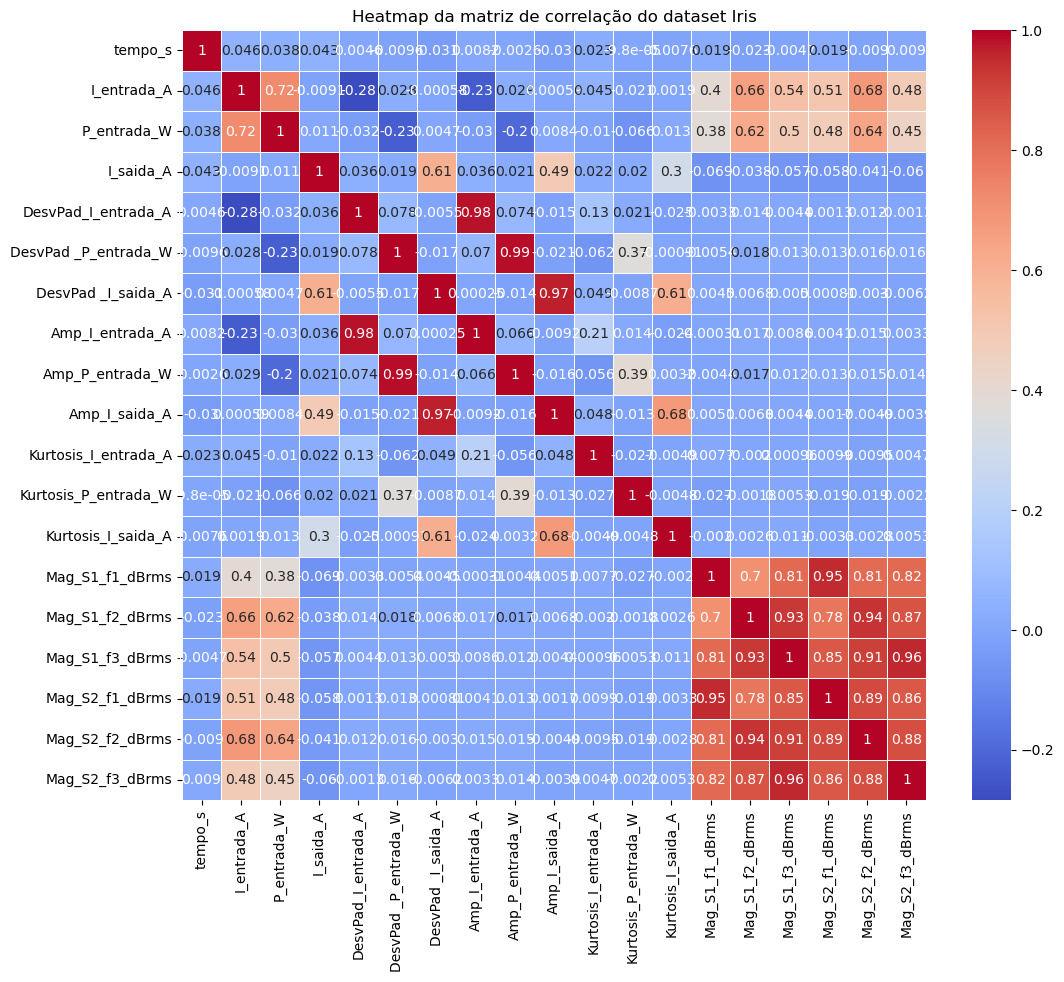

In [15]:
# 4.1. Heatmap da matriz de correlação

import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap da matriz de correlação do dataset Iris')
plt.show()

 A partir da matriz acima, podemos reparar que os desvios padrões e as amplitudes tem uma correlação alta, com isso, será realizado uma análise para julgar como que observamos esses dados em relação aos tipo_setuo (rótulos)

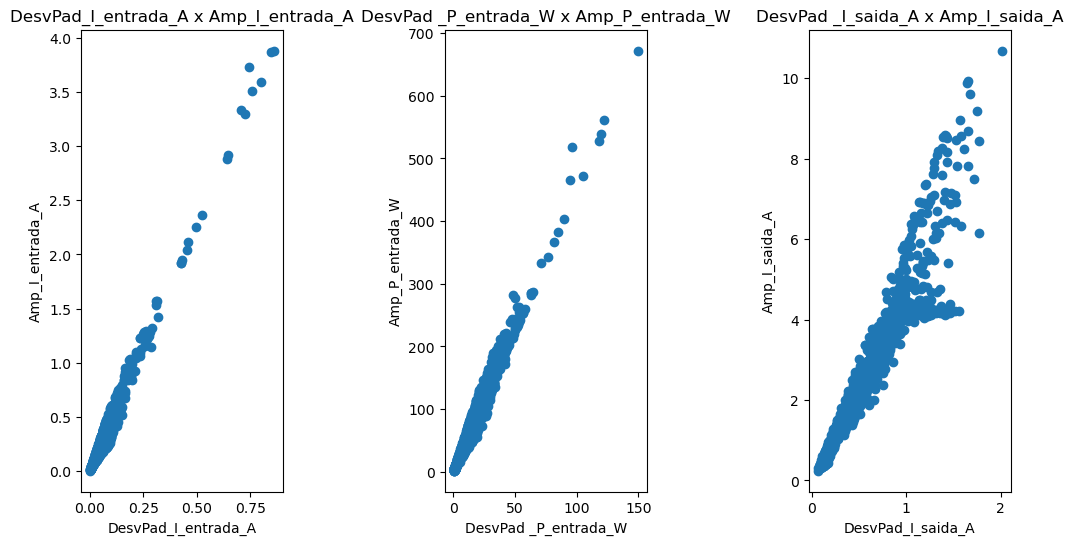

In [16]:
# 3.2. Pairplot (gráfico de pares) de pares de atributos e especies
fig, axs = plt.subplots(1, 3, figsize=(12,6))  # 2 linhas, 3 colunas
fig.subplots_adjust(wspace=0.8)

# DesvPad_I_entrada_A - Amp_I_entrada_A
# DesvPad _P_entrada_W - Amp_P_entrada_W
# DesvPad _I_saida_A - Amp_I_saida_A

# linha 0, coluna 0
axs[0].scatter(motores['DesvPad_I_entrada_A'], motores['Amp_I_entrada_A'])
axs[0].set_title('DesvPad_I_entrada_A x Amp_I_entrada_A')
axs[0].set_xlabel('DesvPad_I_entrada_A')
axs[0].set_ylabel('Amp_I_entrada_A')

# linha 0, coluna 1
axs[1].scatter(motores['DesvPad _P_entrada_W'], motores['Amp_P_entrada_W'])
axs[1].set_title('DesvPad _P_entrada_W x Amp_P_entrada_W')
axs[1].set_xlabel('DesvPad _P_entrada_W')
axs[1].set_ylabel('Amp_P_entrada_W')

# linha 0, coluna 2
axs[2].scatter(motores['DesvPad _I_saida_A'], motores['Amp_I_saida_A'])
axs[2].set_title('DesvPad _I_saida_A x Amp_I_saida_A')
axs[2].set_xlabel('DesvPad_I_saida_A')
axs[2].set_ylabel('Amp_I_saida_A')

plt.show()

Será feito um pairplot para identificar os pontos de dados pelos rótulos e identificar se há alguma tendência de concentração.

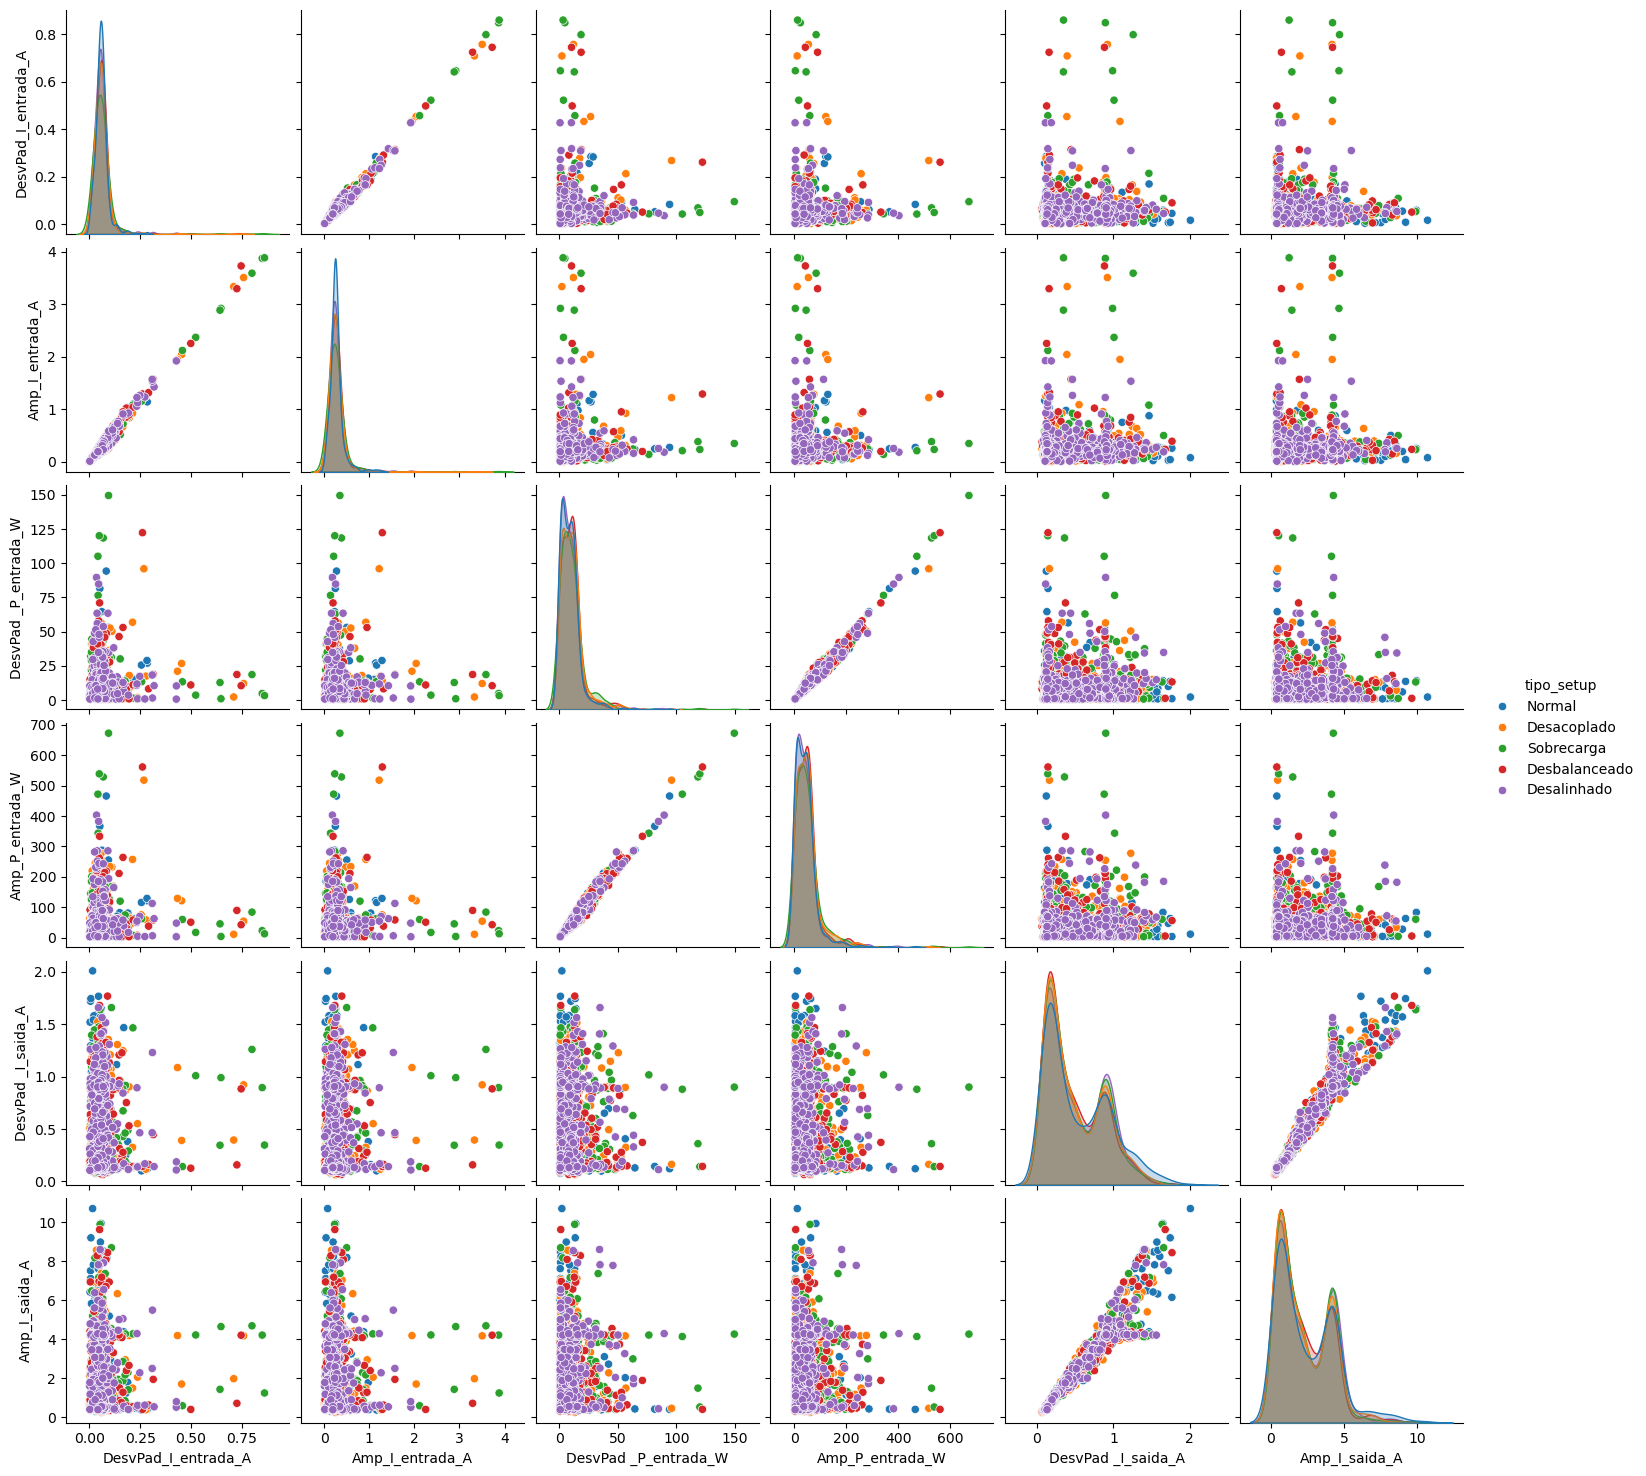

In [17]:
# 3.1. Pairplot (gráfico de pares) de pares de atributos e especies

motores2 = motores[['tipo_setup', 'DesvPad_I_entrada_A', 'Amp_I_entrada_A', 'DesvPad _P_entrada_W', 'Amp_P_entrada_W', 'DesvPad _I_saida_A', 'Amp_I_saida_A']]

sns.pairplot(motores2, hue='tipo_setup')
plt.show()

Não observamos uma tendencia muito forte para diferenciar os tipos de setup, ou seja, com isso iremos descartar um dos atributos relacionados logo acima.

Um outro ponto importante, é notar que não iremos cortar um sensor com isso, dessa forma, voltamos a matriz de correlação e percebe-se que há uma correlação maior com a corrente de entrada com a potência de entrada. Dessa forma será replicado o método para essas métricas avaliando o corte de um sensor.

Text(0, 0.5, 'P_entrada_W')

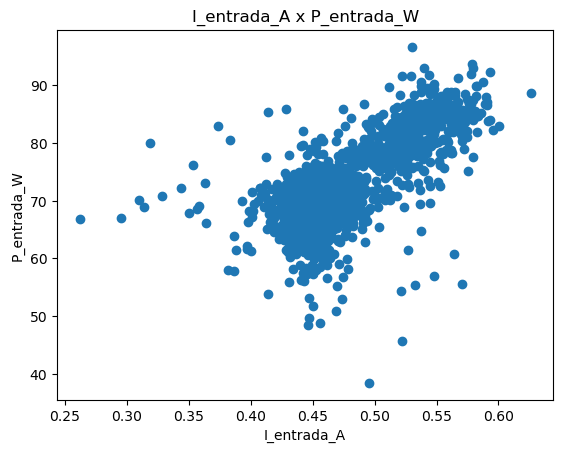

In [18]:
# I_entrada_A	P_entrada_W

plt.scatter(motores['I_entrada_A'], motores['P_entrada_W'])
plt.title('I_entrada_A x P_entrada_W')
plt.xlabel('I_entrada_A')
plt.ylabel('P_entrada_W')

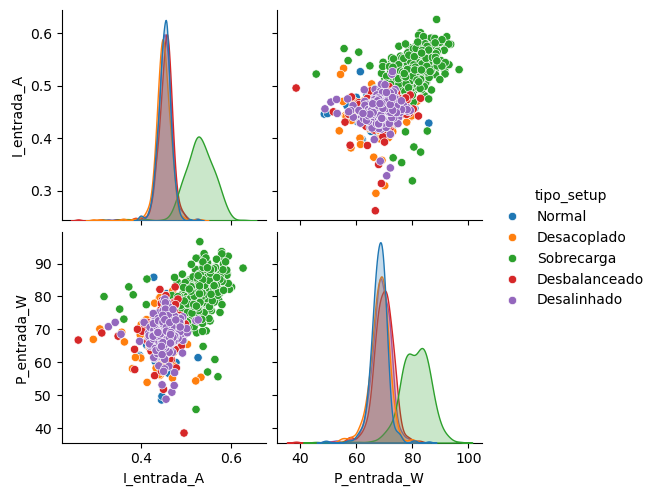

In [19]:
motores2 = motores[['tipo_setup', 'I_entrada_A', 'P_entrada_W']]

sns.pairplot(motores2, hue='tipo_setup')
plt.show()

Após observar os resultados, é possível notar pelo rótulo de Sobrecarga que para a classe de corrente de entrada é melhor para trabalhar em cima, assim deixando redundante o sensor de pontência.

In [20]:
# Mostrando o novo dataframe com a retirada do sensor de potência

motores_f1 = motores.drop(columns = ['P_entrada_W', 'DesvPad _P_entrada_W', 'Amp_P_entrada_W', 'Kurtosis_P_entrada_W'])
motores_f1

,tempo_s,tipo_setup,I_entrada_A,I_saida_A,DesvPad_I_entrada_A,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
0,0.00,Normal,0.44905,1.43660,0.042740,0.113479,0.175,0.406,12.474475,4.223108,-50.647991,-63.189443,-47.864704,-59.629807,-73.010381,-49.583755
1,0.08,Normal,0.44610,1.67860,0.048945,0.854342,0.227,3.843,20.070610,16.966677,-50.696943,-63.340003,-48.313132,-59.591150,-72.360239,-49.473893
2,0.16,Normal,0.45175,1.39950,0.042337,0.284000,0.207,1.395,19.087723,11.032327,-47.724322,-62.837371,-48.384219,-55.194912,-63.127903,-48.083630
3,0.24,Normal,0.43510,1.39705,0.063224,0.219507,0.228,0.973,6.869051,9.136137,-47.652608,-62.613368,-48.768793,-55.275822,-63.310116,-47.937933
4,0.32,Normal,0.45055,1.43375,0.048497,0.111967,0.222,0.425,20.205840,2.818658,-47.019446,-61.314274,-49.016646,-54.665312,-60.825200,-47.886619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,39.68,Desalinhado,0.46575,1.59235,0.042147,0.900427,0.199,4.276,5.486469,21.582764,-33.195195,-52.502279,-41.610532,-37.874381,-49.147213,-42.417970
2501,39.76,Desalinhado,0.44705,1.57365,0.068987,0.904702,0.231,4.218,5.237910,21.593782,-33.360763,-52.868492,-42.054637,-37.995903,-49.251871,-42.703237
2502,39.84,Desalinhado,0.47110,1.77275,0.045194,1.657858,0.191,7.810,9.874863,6.075266,-33.497896,-53.300911,-42.289221,-38.129107,-48.947030,-42.896321
2503,39.92,Desalinhado,0.47745,1.39700,0.043033,0.131019,0.194,0.383,21.320253,1.904577,-33.581380,-53.601503,-42.527074,-38.258422,-48.618126,-42.420583


Com isso, já houve um filtro de features inicial, mas ainda seria interessante conseguir filtrar mais para o processamento ser mais leve.

Será aplicado mais uma seleção de atributos com o uso de sklearn.feature_selection. Esse selecionará uma quantidade definida de melhores atributos com base em mutual_info_classif. Esse processo pode ser iterado posteriormente aumentando ou diminuindo essa quantidade.

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
motores_f1_features = motores_f1.drop(columns = ['tipo_setup'])
# Selecionar os 2 melhores atributos com base em mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=7)
motores_f2 = selector.fit_transform(motores_f1_features, motores_f1["tipo_setup"])

motores_f2

array([[  0.44905 , -50.647991, -63.189443, ..., -59.629807, -73.010381,
        -49.583755],
       [  0.4461  , -50.696943, -63.340003, ..., -59.59115 , -72.360239,
        -49.473893],
       [  0.45175 , -47.724322, -62.837371, ..., -55.194912, -63.127903,
        -48.08363 ],
       ...,
       [  0.4711  , -33.497896, -53.300911, ..., -38.129107, -48.94703 ,
        -42.896321],
       [  0.47745 , -33.58138 , -53.601503, ..., -38.258422, -48.618126,
        -42.420583],
       [  0.48705 , -33.599577, -53.697702, ..., -38.335583, -48.344164,
        -41.96982 ]])

In [24]:
scores = selector.scores_

features = list(motores_f1_features)

feature_scores = pd.DataFrame({'Atributo': features, 'Pontuação': scores}).sort_values(by='Pontuação', ascending=False)

feature_scores

,Atributo,Pontuação
13,Mag_S2_f2_dBrms,1.238016
10,Mag_S1_f2_dBrms,1.219430
11,Mag_S1_f3_dBrms,1.140709
14,Mag_S2_f3_dBrms,1.075853
9,Mag_S1_f1_dBrms,0.866717
12,Mag_S2_f1_dBrms,0.751251
1,I_entrada_A,0.444531
3,DesvPad_I_entrada_A,0.038267
2,I_saida_A,0.034129
6,Amp_I_saida_A,0.011752
